###  To build a model for Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Loading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 704s 4us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Ploting the images with their associated labels

In [26]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

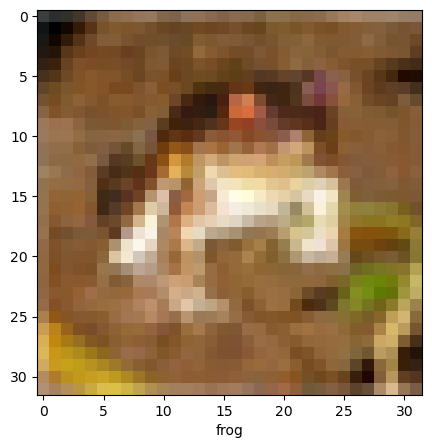

In [25]:
plot_sample(X_train, y_train, 0)

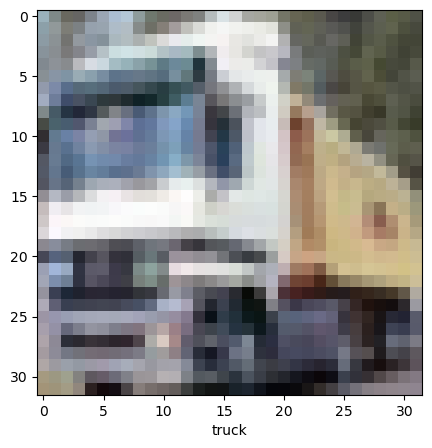

In [13]:
plot_sample(X_train, y_train, 1)

### Normalizing the Training Data

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Building Simple Convolutional Neural Network for Image Classification

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

### Compiling the model

In [16]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

### Fitting the training data to the model

In [17]:
cnn.fit(X_train, y_train, epochs = 20)

Epoch 1/20


1563/1563 [==============================] - 19s 10ms/step - loss: 1.5330 - accuracy: 0.4456
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1935 - accuracy: 0.5755
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0630 - accuracy: 0.6258
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9840 - accuracy: 0.6542
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9340 - accuracy: 0.6732
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8892 - accuracy: 0.6903
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8534 - accuracy: 0.7028
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8168 - accuracy: 0.7147
Epoch 9/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7840 - accuracy: 0.7265
Epoch 10/20
1563/1563 [==============================] - 15s 1

### Evaluating the model

In [18]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9857 - accuracy: 0.6910


[0.9857240915298462, 0.6909999847412109]

### Predicting the output for some test images

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[1.09140801e-05, 1.57272427e-06, 7.17066287e-05, 8.77384841e-01,
        6.09675953e-06, 1.22247063e-01, 2.22632909e-04, 3.58551770e-05,
        1.57095783e-05, 3.57047088e-06],
       [6.84387778e-05, 3.58080640e-02, 5.03112119e-07, 6.93639606e-07,
        1.39878047e-08, 2.80372774e-11, 4.93493282e-08, 3.29980321e-10,
        9.62009013e-01, 2.11320166e-03],
       [3.32578644e-02, 3.98543060e-01, 7.06577383e-04, 2.45169178e-03,
        9.35869612e-05, 1.62365050e-05, 1.25339764e-04, 3.29167488e-05,
        5.61301470e-01, 3.47117684e-03],
       [5.41739404e-01, 1.82135850e-02, 7.56676821e-03, 1.94712379e-03,
        5.77393686e-04, 1.67293128e-05, 6.22678257e-04, 1.11644265e-04,
        4.28938538e-01, 2.66100658e-04],
       [2.09253031e-07, 4.30950877e-06, 7.48016059e-01, 1.11450016e-01,
        4.04394306e-02, 3.22524644e-02, 6.64810464e-02, 7.75723041e-09,
        1.35638996e-03, 3.89826873e-08]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 2]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

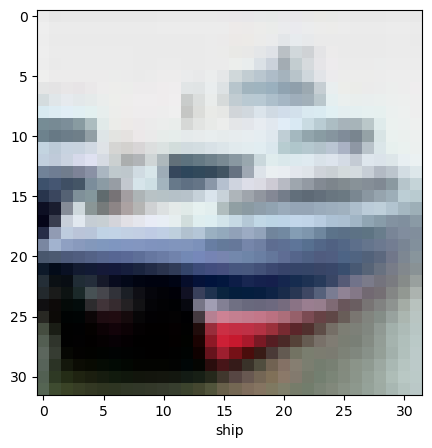

In [27]:
plot_sample(X_test, y_test, 1)

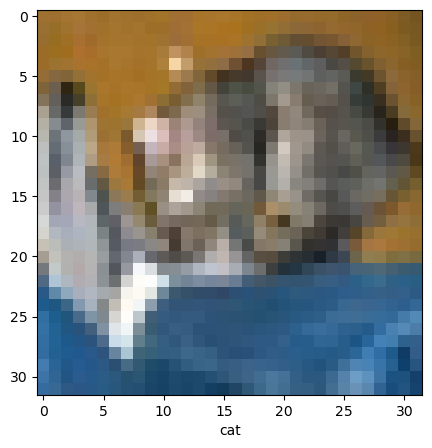

In [28]:
plot_sample(X_test,y_test,0)

In [23]:
classes[y_classes[1]]

'ship'

In [30]:
classes[y_classes[0]]

'cat'